In [22]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter


def try_till_success(n):
    '''
    1. 1회씩 시도(Bernoulli)하여 성공 횟수가 10회 누적될 때까지 try count를 누적시킨다
    2. 10번 성공하면 try_counts에 append 한 뒤 초기화
    3. 1~2를 n회 반복
    *numpy에는 Bernoulli가 없으니 이항 분포에서 n=1로 하여 대신 사용한다.
    '''
    try_counts = []
    for _ in tqdm(range(n)):
        try_count = 0
        success_count = 0
        while True:
            try_count += 1
            num = np.random.binomial(1, 0.7)
            if num == 1:
                success_count += 1
            if success_count == 10:
                try_counts.append(try_count)
                break
    return try_counts


def bar_plotter(nums):

    num_counter = Counter(nums)
    plt.bar(
            num_counter.keys(),
            num_counter.values(),
            width=0.9, alpha=0.3
           )
    plt.show()

100%|██████████| 100000/100000 [00:04<00:00, 23387.42it/s]


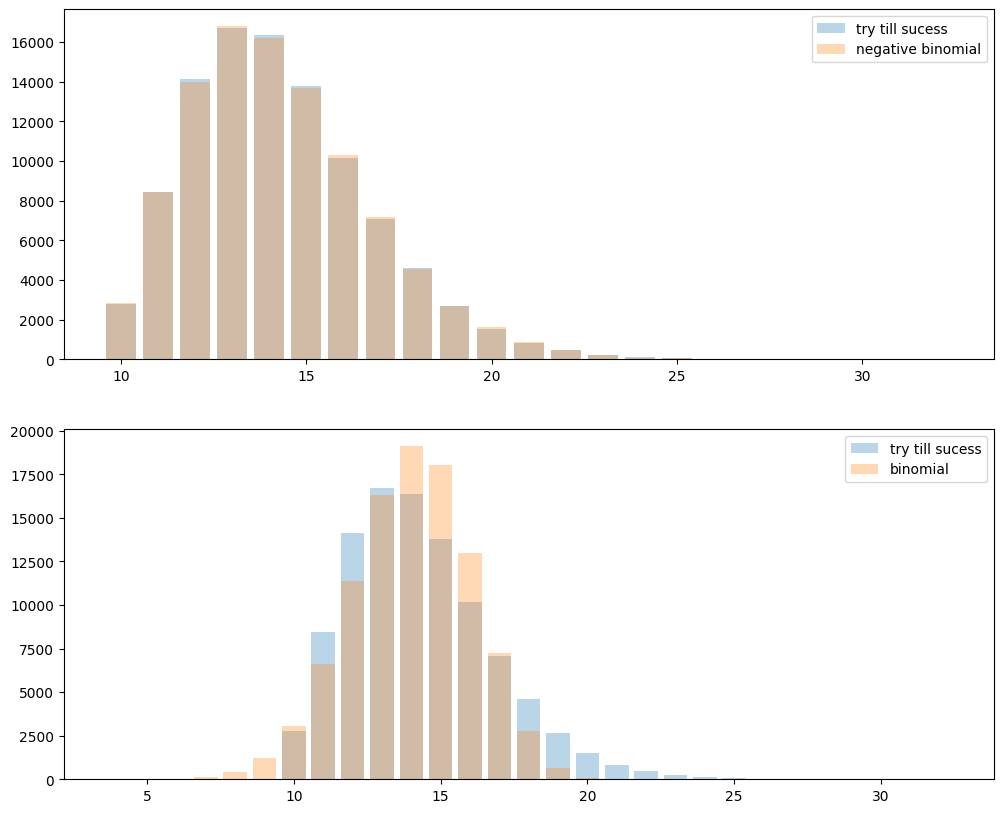

In [23]:
n = 100000
p = 0.7
try_list = try_till_success(n)
nb_list = [10+np.random.negative_binomial(10, p) for _ in range(n)]
binom_list = [np.random.binomial(int(10/0.7**2), p) for _ in range(n)]

try_counter = Counter(try_list)
nb_counter = Counter(nb_list)
binom_counter = Counter(binom_list)

plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.bar(try_counter.keys(), try_counter.values(), alpha=0.3)
plt.bar(nb_counter.keys(), nb_counter.values(), alpha=.3)
plt.legend(['try till sucess', 'negative binomial'])

plt.subplot(2,1,2)
plt.bar(try_counter.keys(), try_counter.values(), alpha=0.3)
plt.bar(binom_counter.keys(), binom_counter.values(), alpha=.3)
plt.legend(['try till sucess', 'binomial'])
plt.show()